In [ ]:
!pip install torch transformers

In [2]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import torch
import matplotlib.pyplot as plt

In [ ]:
# Load the model and processor
processor = AutoImageProcessor.from_pretrained("Dewa/dog_emotion_v2")
model = AutoModelForImageClassification.from_pretrained("Dewa/dog_emotion_v2")


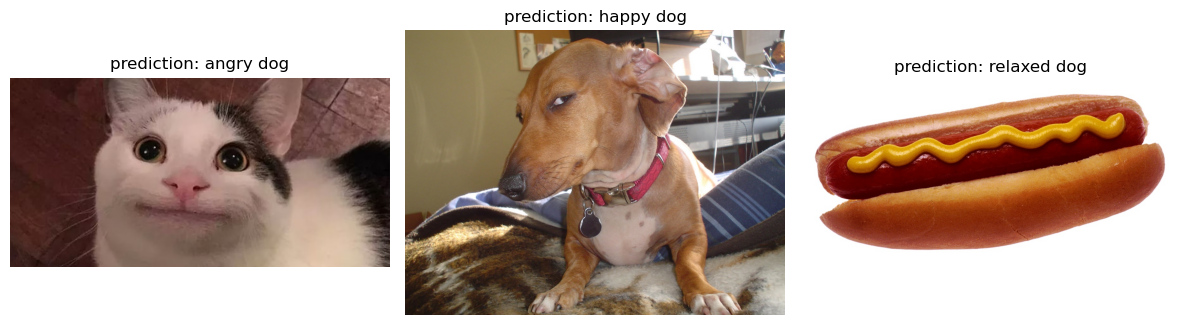

In [15]:
# List of image paths
image_paths = ["./img/cat.jpg", "./img/dog.jpg", "./img/hotdog.jpg"]  # Replace with your actual file paths

# Create a function to process and predict
def classify_image(image_path):
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")
    
    # Run the model
    outputs = model(**inputs)
    logits = outputs.logits
    
    # Get the predicted class
    predicted_class_idx = torch.argmax(logits).item()
    class_label = model.config.id2label[predicted_class_idx]
    
    return image, class_label

# Loop through images, classify, and display
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

for idx, image_path in enumerate(image_paths):
    # Classify the image
    image, predicted_class = classify_image(image_path)
    
    # Plot the image with the predicted class
    plt.subplot(1, 3, idx + 1)  # 1 row, 3 columns, current position
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"prediction: {predicted_class} dog")

# Show the images
plt.tight_layout()
plt.show()
